Random Forest scores with different n_estimators: [0.7704918032786885, 0.8688524590163934, 0.8688524590163934, 0.8524590163934426, 0.8688524590163934, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426]


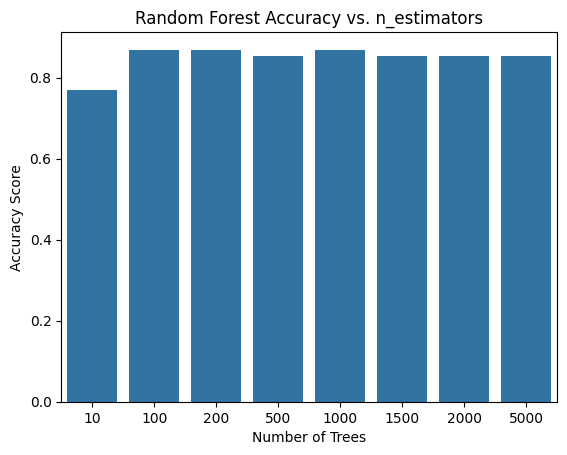

Random Forest scores with different max_depth: [0.8688524590163934, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918]


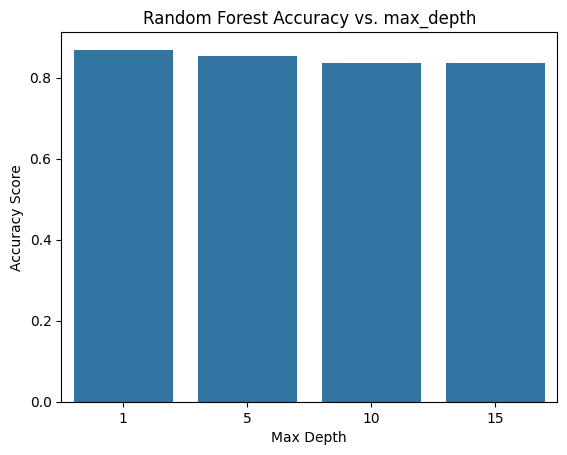

Random Forest accuracy is 86.9%

Permutation Importances for Random Forest:
 thal_2                         0.0459 +/- 0.0387
 vessels                        0.0230 +/- 0.0222
 thal_3                         0.0197 +/- 0.0230
 oldpeak                        0.0180 +/- 0.0186
 exang_1                        0.0098 +/- 0.0131
 slope_1                        0.0098 +/- 0.0197
 slope_2                        0.0098 +/- 0.0197
 age                            0.0082 +/- 0.0110
 sex_1                          0.0066 +/- 0.0080
 chest_pain_2                   0.0049 +/- 0.0105
 thal_1                         0.0000 +/- 0.0000
 chest_pain_3                   0.0000 +/- 0.0000
 blood_sugar_1                  0.0000 +/- 0.0000
 restecg_1                      0.0000 +/- 0.0000
 restecg_2                      0.0000 +/- 0.0000
 chest_pain_1                   0.0000 +/- 0.0000
 thalach                        0.0000 +/- 0.0000
 cholesterol                    0.0000 +/- 0.0000
 blood_pressure         

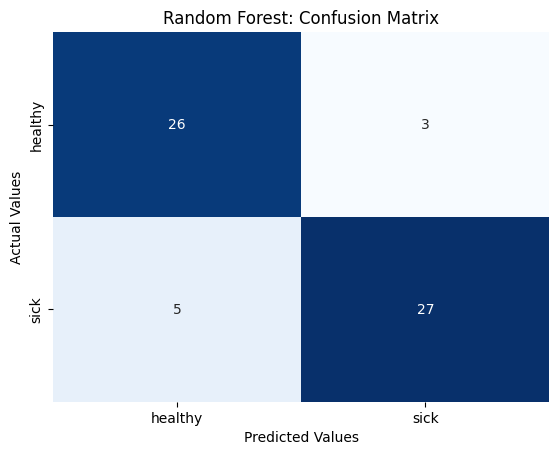


Classification Report (Random Forest):
              precision    recall  f1-score   support

     healthy       0.84      0.90      0.87        29
        sick       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


K Nearest Neighbors accuracy (k=11) is 82.0%


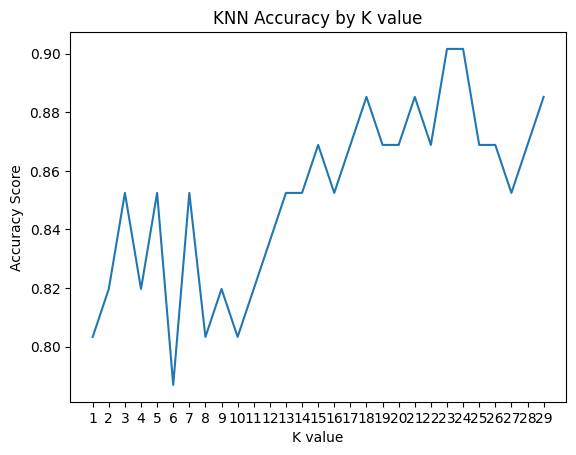

Max KNN Accuracy is 90.16% at k=23
K Nearest Neighbors accuracy (k=23) is 90.2%


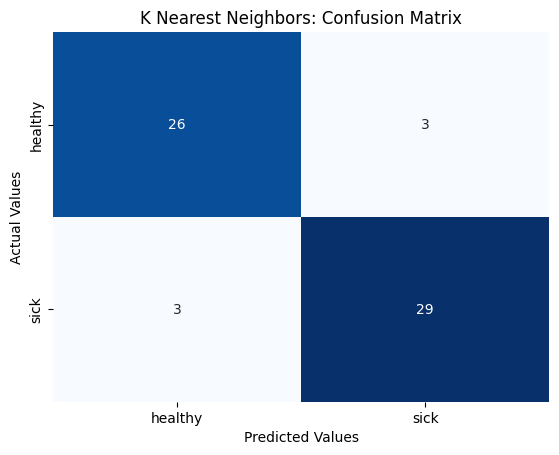


Classification Report (KNN, k=23):
              precision    recall  f1-score   support

     healthy       0.90      0.90      0.90        29
        sick       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Logistic Regression accuracy is 90.2%


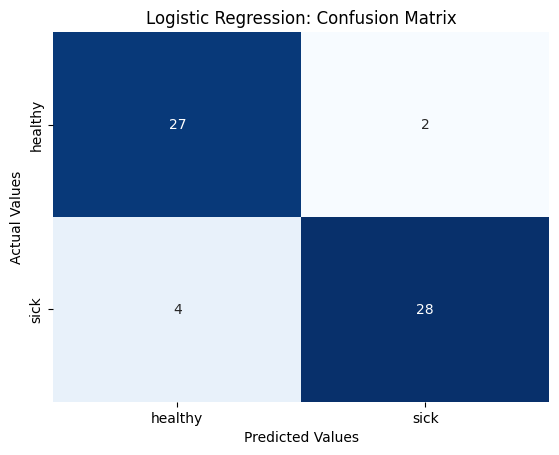


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     healthy       0.87      0.93      0.90        29
        sick       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Naive Bayes accuracy is 86.9%


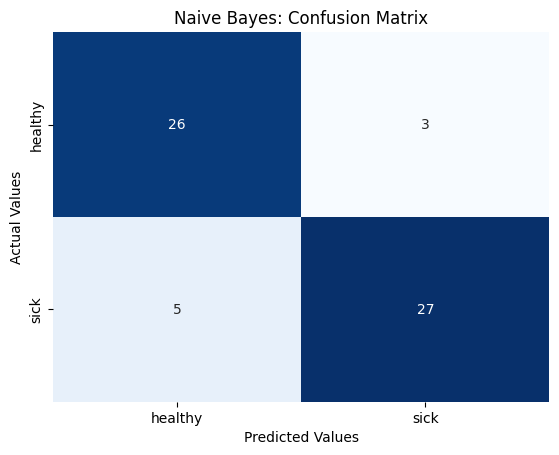


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

     healthy       0.84      0.90      0.87        29
        sick       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import numpy as np
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

# 1. Load and rename columns
heart = pd.read_csv('heart.csv')
heart = heart.rename(columns={
    "cp": "chest_pain",
    "trestbps": "blood_pressure",
    "fbs": "blood_sugar",
    "ca": "vessels",
    "chol": "cholesterol"
})

# 2. Scale numeric columns
standardScaler = StandardScaler()
columns_to_scale = ['age', 'blood_pressure', 'cholesterol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

# 3. One-hot encode
heart = pd.get_dummies(
    heart,
    columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'],
    drop_first=True
)

# 4. Train/test split
labels = heart['target']
features = heart.drop(['target'], axis=1)

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# ---------------------------
# RANDOM FOREST
# ---------------------------

# A) Check performance for various n_estimators
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    rf_temp = RandomForestClassifier(n_estimators=x, random_state=1, max_depth=1)
    rf_temp.fit(features_train, labels_train)
    randomForest_scores.append(rf_temp.score(features_test, labels_test))

print("Random Forest scores with different n_estimators:", randomForest_scores)

plt.figure()
sns.barplot(x=trees, y=randomForest_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs. n_estimators')
plt.show()

# B) Check performance for various max_depth
randomForest_scores = []
depth = [1, 5, 10, 15]
for d in depth:
    rf_temp = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=d)
    rf_temp.fit(features_train, labels_train)
    randomForest_scores.append(rf_temp.score(features_test, labels_test))

print("Random Forest scores with different max_depth:", randomForest_scores)

plt.figure()
sns.barplot(x=depth, y=randomForest_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs. max_depth')
plt.show()

# C) Train final Random Forest
randomForest = RandomForestClassifier(n_estimators=1000, random_state=1, max_depth=1)
randomForest.fit(features_train, labels_train)
score = round(randomForest.score(features_test, labels_test), 3) * 100
print(f"Random Forest accuracy is {score}%")

# D) Permutation Importance (scikit-learn built-in)
rf_result = permutation_importance(randomForest, features_test, labels_test,
                                   n_repeats=10, random_state=42)
rf_importances = rf_result.importances_mean
rf_stds = rf_result.importances_std
feature_names = features_test.columns

print("\nPermutation Importances for Random Forest:")
for idx in rf_importances.argsort()[::-1]:
    print(f" {feature_names[idx]:<30} {rf_importances[idx]:.4f} +/- {rf_stds[idx]:.4f}")

# E) Confusion Matrix & Classification Report
labels_predicted = randomForest.predict(features_test)
plt.figure()
conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(labels_test, labels_predicted, target_names=['healthy', 'sick']))

# ---------------------------
# K NEAREST NEIGHBORS
# ---------------------------

# A) KNN with k=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(features_train, labels_train)
knn_score = round(knn.score(features_test, labels_test), 3) * 100
print(f"\nK Nearest Neighbors accuracy (k=11) is {knn_score}%")

# B) Search for best K
accuracyScores = []
for x in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))

plt.figure()
sns.lineplot(x=range(1,30), y=accuracyScores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy by K value")
plt.show()

best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2)
print(f"Max KNN Accuracy is {max_score}% at k={best_k}")

# C) KNN with k=23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(features_train, labels_train)
knn_score23 = round(knn.score(features_test, labels_test), 3) * 100
print(f"K Nearest Neighbors accuracy (k=23) is {knn_score23}%")

labels_predicted = knn.predict(features_test)
plt.figure()
conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')
plt.show()

print("\nClassification Report (KNN, k=23):")
print(classification_report(labels_test, labels_predicted, target_names=['healthy', 'sick']))

# ---------------------------
# LOGISTIC REGRESSION
# ---------------------------

logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(features_train, labels_train)
lr_score = round(logisticRegression.score(features_test, labels_test), 3) * 100
print(f"\nLogistic Regression accuracy is {lr_score}%")

labels_predicted = logisticRegression.predict(features_test)
plt.figure()
conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

print("\nClassification Report (Logistic Regression):")
print(classification_report(labels_test, labels_predicted, target_names=['healthy', 'sick']))

# ---------------------------
# NAIVE BAYES
# ---------------------------

nb = GaussianNB()
nb.fit(features_train, labels_train)
nb_score = round(nb.score(features_test, labels_test), 3) * 100
print(f"\nNaive Bayes accuracy is {nb_score}%")

labels_predicted = nb.predict(features_test)
plt.figure()
conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes: Confusion Matrix')
plt.show()

print("\nClassification Report (Naive Bayes):")
print(classification_report(labels_test, labels_predicted, target_names=['healthy', 'sick']))
